In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_excel('BaseDados_RegressaoLogistica.xlsx')
df.head()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0


In [55]:
df.rename(columns={"Id Cliente": "id_cliente",
                    "Renda": "renda",
                    "Tipo Renda": "tipo_renda",
                     "Possui Imóvel":  "possui_imovel",
                      "Comprou?": "comprou"}, inplace=True)

In [46]:
df.isna().sum()

id_cliente       0
renda            0
tipo_renda       0
possui_imovel    0
Comprou?         0
dtype: int64

In [56]:
df.describe()

,id_cliente,renda,tipo_renda,possui_imovel,comprou
count,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,8520.77000,1.400000,1.85000,0.640000
std,29.011492,4039.01965,0.710669,0.35887,0.482418
min,1.000000,1643.00000,1.000000,1.00000,0.000000
25%,25.750000,5455.25000,1.000000,2.00000,0.000000
50%,50.500000,8824.00000,1.000000,2.00000,1.000000
75%,75.250000,12036.00000,2.000000,2.00000,1.000000
max,100.000000,14994.00000,3.000000,2.00000,1.000000


In [48]:
#calculando CV da renda

(np.std(df.renda) / df.renda.mean()) * 100

47.16444417751077

<AxesSubplot: xlabel='renda', ylabel='Count'>

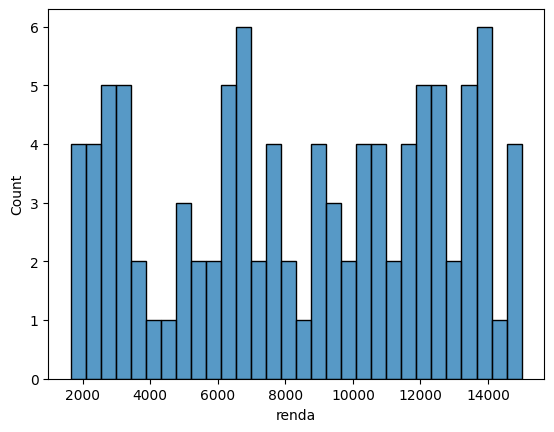

In [49]:

sns.histplot(df['renda'], bins=30)

<AxesSubplot: xlabel='tipo_renda', ylabel='count'>

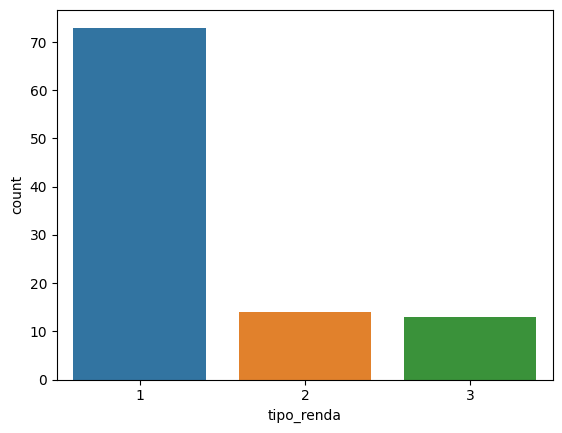

In [51]:
sns.countplot(data=df, x='tipo_renda')

<AxesSubplot: xlabel='possui_imovel', ylabel='count'>

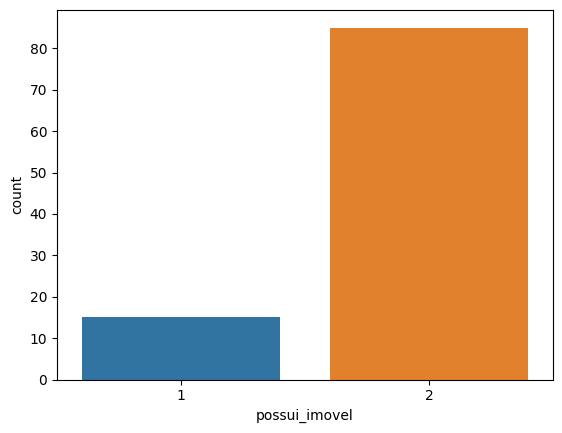

In [58]:
sns.countplot(data=df, x='possui_imovel')

In [60]:
df.value_counts('possui_imovel', normalize=True) * 100

possui_imovel
2    85.0
1    15.0
dtype: float64

<AxesSubplot: xlabel='comprou', ylabel='count'>

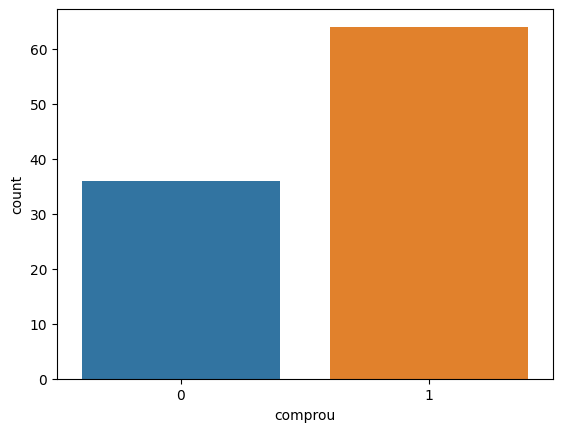

In [57]:
sns.countplot(data=df, x='comprou')

In [62]:
df.value_counts('comprou', normalize=True) * 100

comprou
1    64.0
0    36.0
dtype: float64

<AxesSubplot: xlabel='tipo_renda', ylabel='renda'>

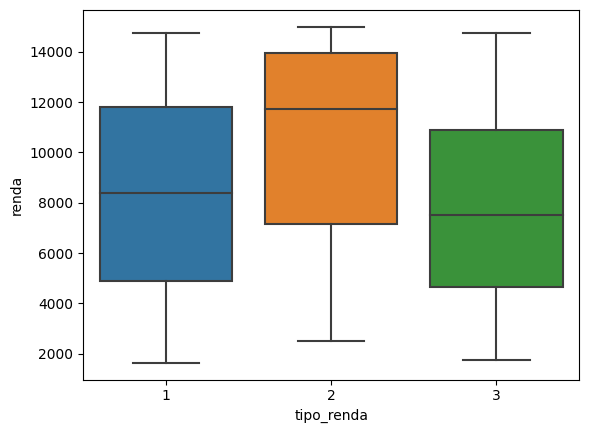

In [66]:
sns.boxplot(data = df, x = 'tipo_renda', y = 'renda')

<AxesSubplot: xlabel='possui_imovel', ylabel='renda'>

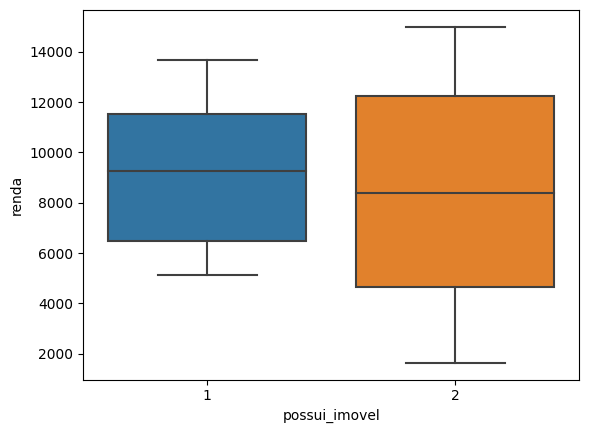

In [68]:
sns.boxplot(data = df, x = 'possui_imovel', y = 'renda')

<AxesSubplot: xlabel='comprou', ylabel='renda'>

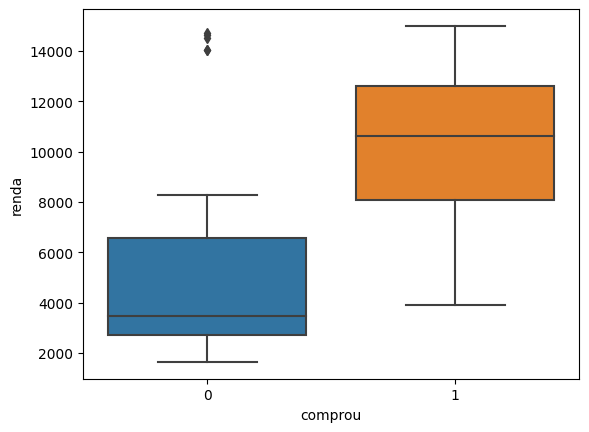

In [70]:
sns.boxplot(data = df, x = 'comprou', y = 'renda')

<AxesSubplot: xlabel='renda', ylabel='comprou'>

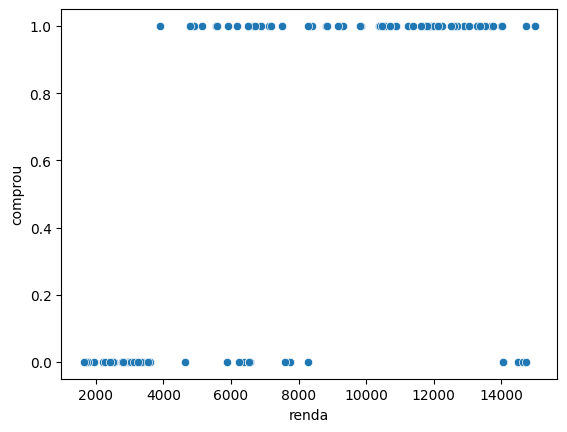

In [72]:
sns.scatterplot(data = df, x = 'renda', y = 'comprou')

In [74]:
x = df.drop(columns=['id_cliente', "comprou"])
y = df.comprou

In [75]:
from sklearn.model_selection import train_test_split

SEED = 5

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify= y , test_size= 0.2 ,random_state=SEED)



In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_treino, y_treino)


LogisticRegression()

In [82]:
from sklearn.metrics import accuracy_score

previsao = model.predict(x_teste)
print("acurácia: ", (accuracy_score(y_teste, previsao)) * 100)

acurácia:  90.0


<AxesSubplot: >

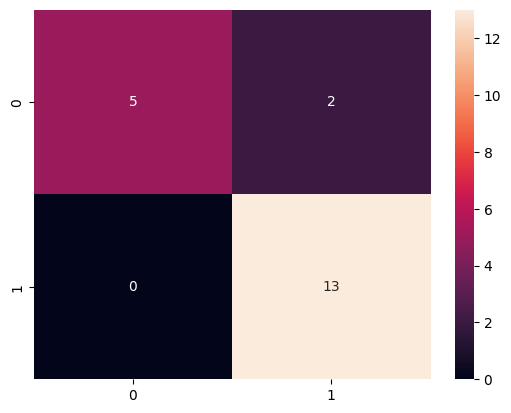

In [87]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_teste, previsao), annot=True)


In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, previsao))


              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.87      1.00      0.93        13

    accuracy                           0.90        20
   macro avg       0.93      0.86      0.88        20
weighted avg       0.91      0.90      0.90        20

